In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore", category=FutureWarning)

file_path = "C:/Users/neilv/Downloads/All_Children_Attendance.csv"

df = pd.read_csv(file_path)

In [198]:
df

,Title,Date,Month,Fiscal Year,Library,Primary Event Type,Event Type Option 1,Event Type Option 2,Primary Age Group,Age Group Option 1,Age Group Option 2,Description,Internal Notes,Published Status,Attendance
0,Me and You-kelele Storytime,07/01/2016,Jul,FY 17,Noyes Library for Young Children,Storytime,ACE - All Children Excel,NaN,Babies and Toddlers,Preschool and Kindergarten,NaN,"Come Sing, Read, and Rhyme With Us! Stories an...",NaN,Yes,65.0
1,MC Infants & Toddlers Bilingual Storytime,07/01/2016,Jul,FY 17,Gaithersburg,Z_Visits In,Storytime,NaN,Babies and Toddlers,Preschool and Kindergarten,NaN,open bilingual storytime hosted in the library...,NaN,No,90.0
2,lego weekend,07/01/2016,Jul,FY 17,Silver Spring,Science & Math (STEM),ACE - All Children Excel,NaN,Preschool and Kindergarten,Elementary School Age,NaN,friday 2pm- sunday,NaN,No,NaN
3,LEGO Playtime,07/01/2016,Jul,FY 17,Twinbrook,Makerspace,ACE - All Children Excel,Science & Math (STEM),Elementary School Age,Preschool and Kindergarten,NaN,Drop-in for an open session of imaginative con...,NaN,Yes,17.0
4,LEGO Crew,07/01/2016,Jul,FY 17,Gaithersburg,Science & Math (STEM),ACE - All Children Excel,Makerspace,Elementary School Age,Preschool and Kindergarten,NaN,Come showcase your creativity at this free dro...,NaN,Yes,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,Act it Out,06/29/2017,Jun,FY 17,Olney,Storytime,ACE - All Children Excel,NaN,Elementary School Age,NaN,NaN,We will read a story and then the kids will ac...,NaN,Yes,9.0
1777,MC Infants & Toddlers Bilingual Storytime,06/30/2017,Jun,FY 17,Gaithersburg,Z_Visits In,Storytime,NaN,Babies and Toddlers,Preschool and Kindergarten,NaN,open bilingual storytime hosted in the library...,NaN,No,30.0
1778,Lego Construction Crew,06/30/2017,Jun,FY 17,Olney,Science & Math (STEM),ACE - All Children Excel,NaN,Elementary School Age,NaN,NaN,Drop in every Friday afternoon between 3:30 an...,NaN,Yes,23.0
1779,LEGO and DUPLO Playtime,06/30/2017,Jun,FY 17,Twinbrook,Makerspace,ACE - All Children Excel,Science & Math (STEM),Elementary School Age,Preschool and Kindergarten,NaN,Drop-in for an open session of imaginative con...,NaN,Yes,NaN


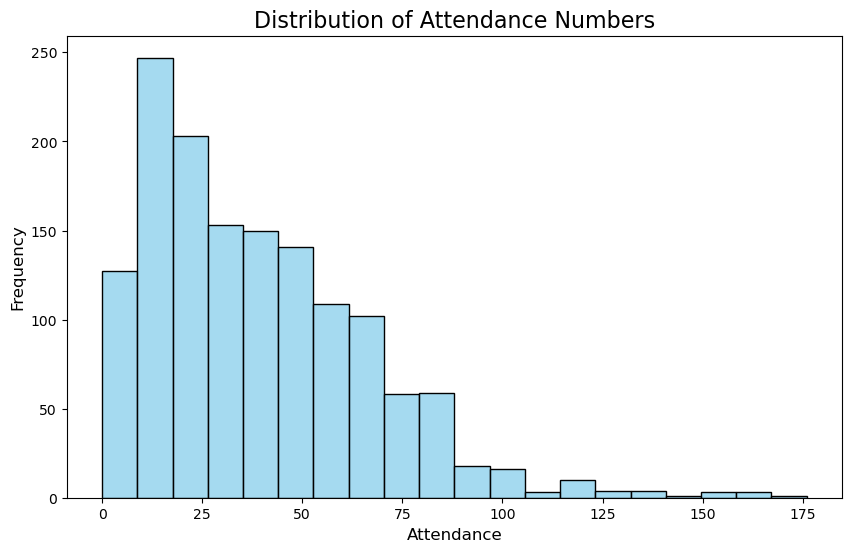

In [247]:
#Problem 1: Plotting Attendance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Attendance'], bins=20, color='skyblue')

plt.title('Distribution of Attendance Numbers', fontsize=16)
plt.xlabel('Attendance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

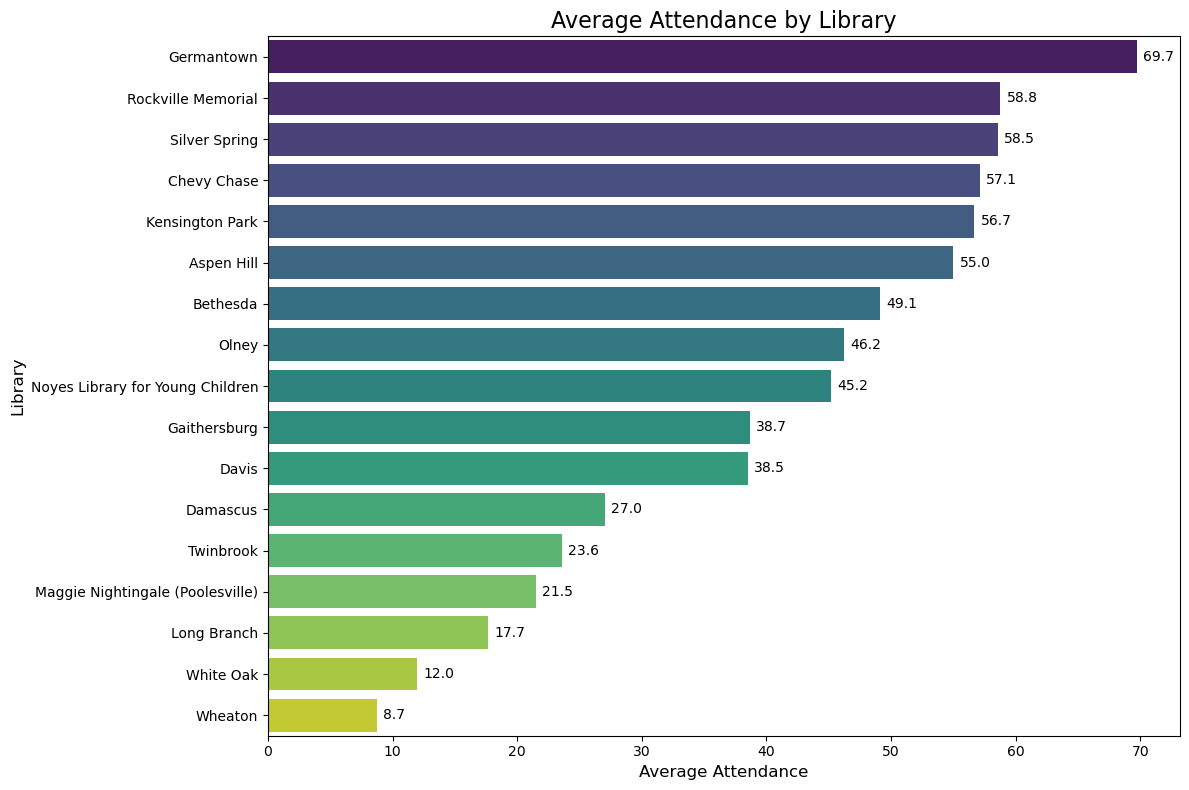

In [200]:
#Problem 2: Event Attendance by Library
library_attendance = df.groupby('Library')['Attendance'].mean().reset_index()
library_attendance = library_attendance.sort_values('Attendance', ascending=False)

plt.figure(figsize=(12, 8))
chart = sns.barplot(x='Attendance', y='Library', data=library_attendance, palette='viridis')

plt.title('Average Attendance by Library', fontsize=16)
plt.xlabel('Average Attendance', fontsize=12)
plt.ylabel('Library', fontsize=12)

for i, v in enumerate(library_attendance['Attendance']):
    chart.text(v + 0.5, i, f'{v:.1f}', va='center')

plt.tight_layout()
plt.show()

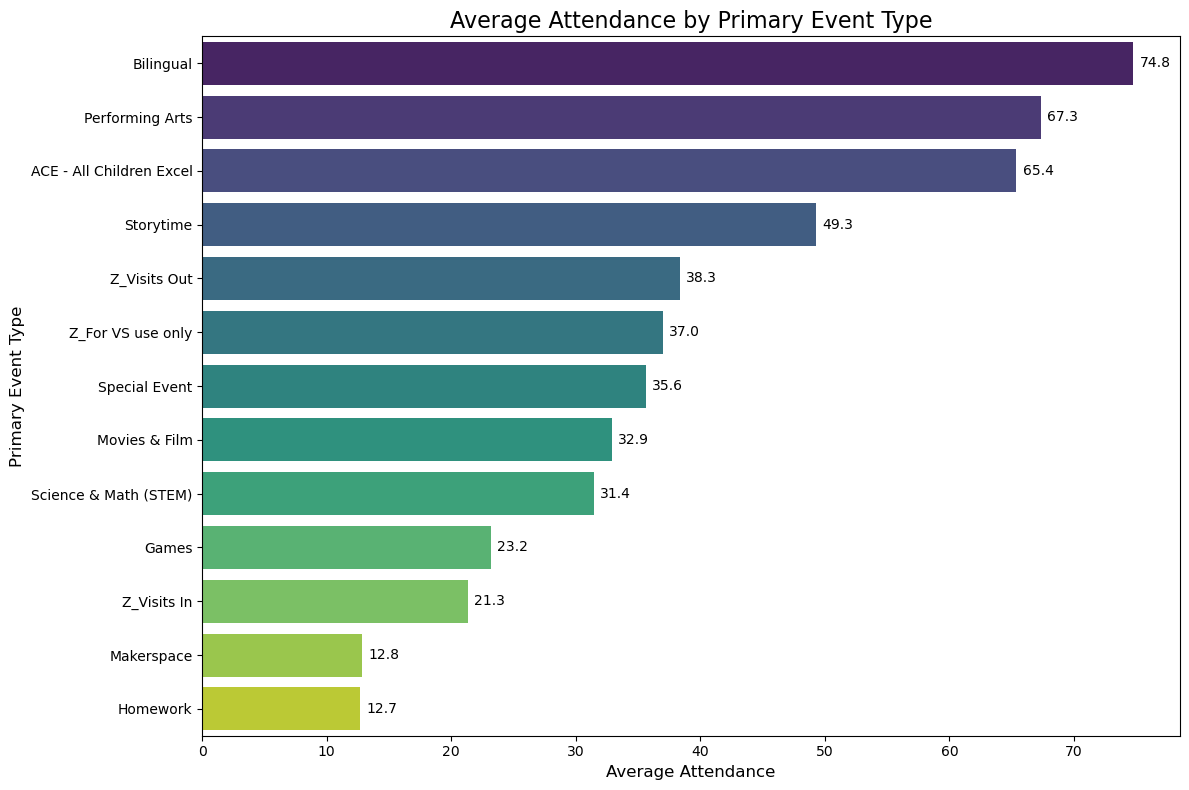

In [201]:
#Problem 3: Event Types and Attendance
event_attendance = df.groupby('Primary Event Type')['Attendance'].mean().reset_index()
event_attendance = event_attendance.sort_values('Attendance', ascending=False)

plt.figure(figsize=(12, 8))
chart = sns.barplot(x='Attendance', y='Primary Event Type', data=event_attendance, palette='viridis')

plt.title('Average Attendance by Primary Event Type', fontsize=16)
plt.xlabel('Average Attendance', fontsize=12)
plt.ylabel('Primary Event Type', fontsize=12)

for i, v in enumerate(event_attendance['Attendance']):
    chart.text(v + 0.5, i, f'{v:.1f}', va='center')

plt.tight_layout()
plt.show()

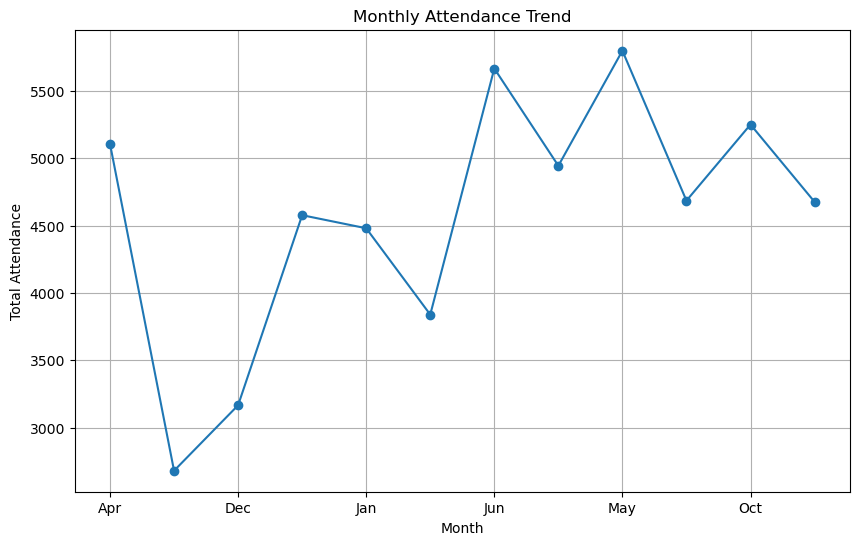

In [202]:
#Problem 4: Attendance by Month
monthly_attendance = df.groupby('Month')['Attendance'].sum()
plt.figure(figsize=(10,6))
monthly_attendance.plot(marker='o')
plt.title('Monthly Attendance Trend')
plt.xlabel('Month')
plt.ylabel('Total Attendance')
plt.grid(True)
plt.show()

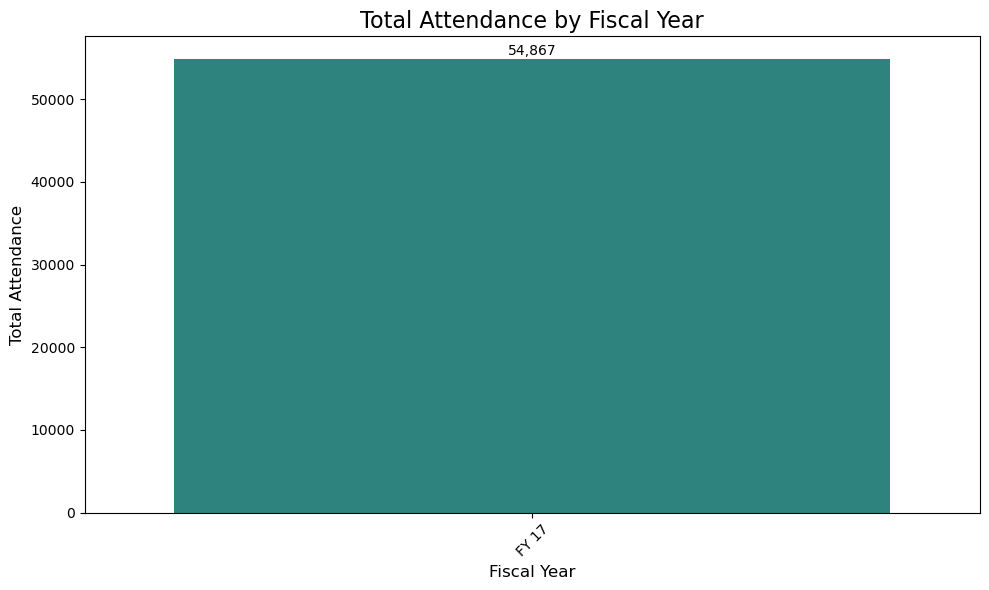

In [203]:
#Problem 5: Fiscal Year Comparison
fiscal_attendance = df.groupby('Fiscal Year')['Attendance'].sum().reset_index()

plt.figure(figsize=(10, 6))
chart = sns.barplot(x='Fiscal Year', y='Attendance', data=fiscal_attendance, palette='viridis')

plt.title('Total Attendance by Fiscal Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Total Attendance', fontsize=12)

for i, v in enumerate(fiscal_attendance['Attendance']):
    chart.text(i, v + 500, f'{v:,.0f}', ha='center')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

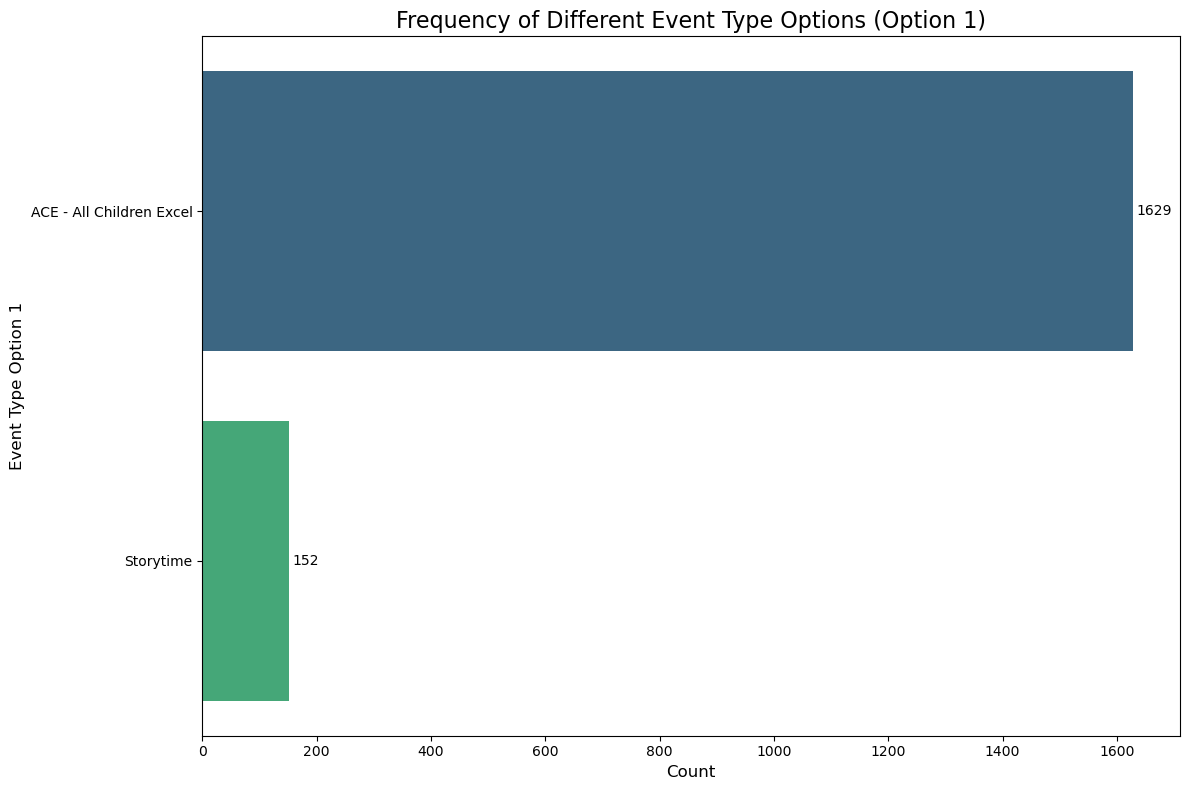

In [204]:
#Problem 6: Event Type Options Analysis
df_filtered = df[df['Event Type Option 1'].notna()]

plt.figure(figsize=(12, 8))
chart = sns.countplot(y='Event Type Option 1', data=df_filtered, palette='viridis')

plt.title('Frequency of Different Event Type Options (Option 1)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Event Type Option 1', fontsize=12)

for i, v in enumerate(df_filtered['Event Type Option 1'].value_counts()):
    chart.text(v + 5, i, str(v), va='center')

plt.tight_layout()
plt.show()

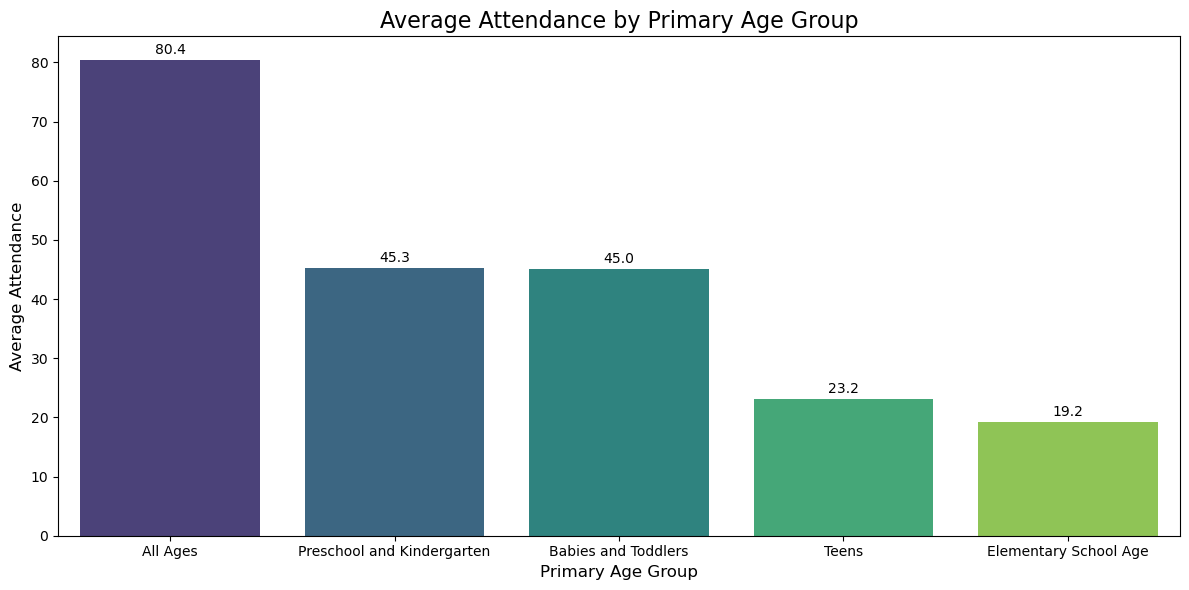

In [205]:
#Problem 7: Age Group Analysis
age_attendance = df.groupby('Primary Age Group')['Attendance'].mean().reset_index()
age_attendance = age_attendance.sort_values('Attendance', ascending=False)

plt.figure(figsize=(12, 6))
chart = sns.barplot(x='Primary Age Group', y='Attendance', data=age_attendance, palette='viridis')

plt.title('Average Attendance by Primary Age Group', fontsize=16)
plt.xlabel('Primary Age Group', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)

for i, v in enumerate(age_attendance['Attendance']):
    chart.text(i, v + 1, f'{v:.1f}', ha='center')

plt.tight_layout()
plt.show()

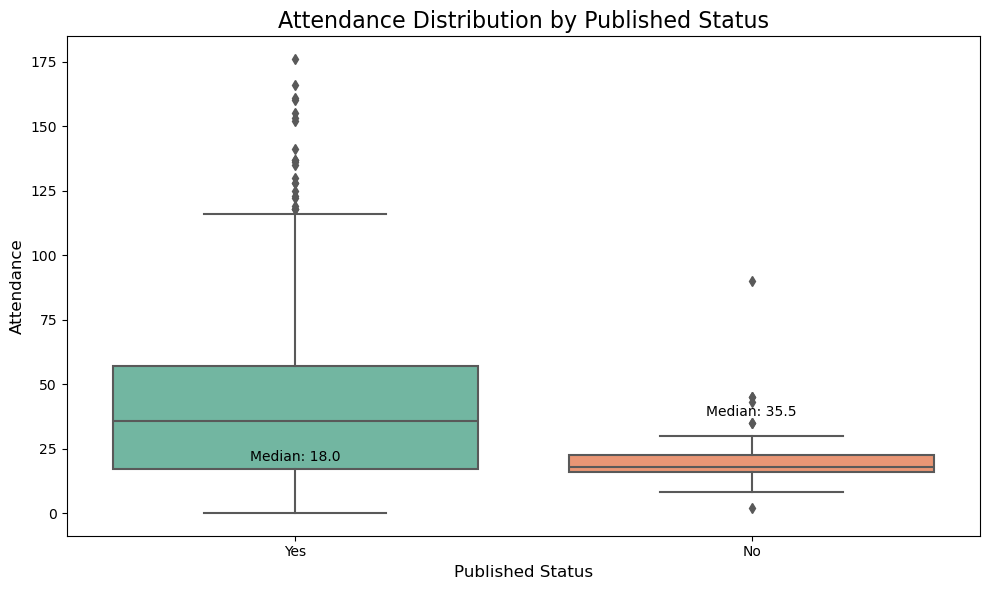

In [206]:
#Problem 8: Attendance Distribution by Published Status
plt.figure(figsize=(10, 6))
chart = sns.boxplot(x='Published Status', y='Attendance', data=df, palette='Set2')

plt.title('Attendance Distribution by Published Status', fontsize=16)
plt.xlabel('Published Status', fontsize=12)
plt.ylabel('Attendance', fontsize=12)

for i, (status, group) in enumerate(df.groupby('Published Status')):
    median_val = group['Attendance'].median()
    chart.text(i, median_val + 2, f'Median: {median_val:.1f}', ha='center')

plt.tight_layout()
plt.show()

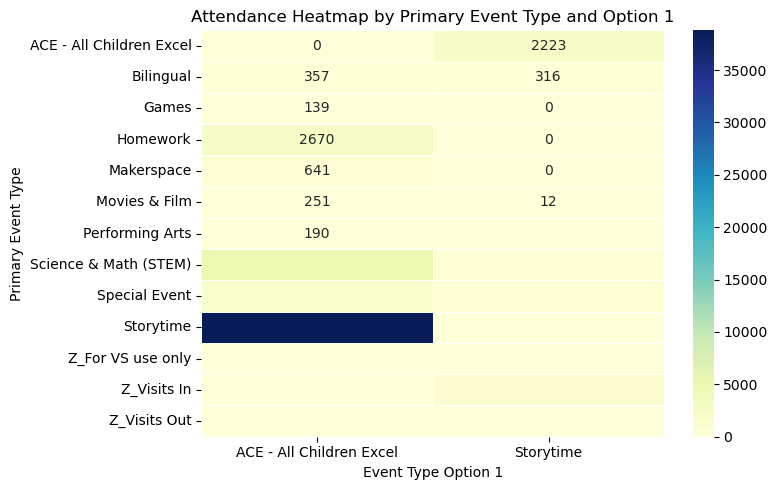

In [207]:
#Problem 9: Attendance by Event Type Combination
combo_attendance = df.groupby(["Primary Event Type", "Event Type Option 1"])["Attendance"].sum().unstack().fillna(0)

# Create the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(combo_attendance, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Attendance Heatmap by Primary Event Type and Option 1")
plt.xlabel("Event Type Option 1")
plt.ylabel("Primary Event Type")
plt.tight_layout()
plt.show()

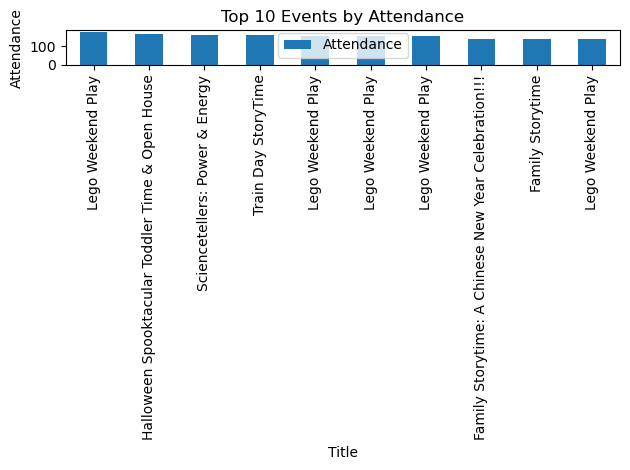

In [208]:
#Problem 10: Top Events by Attendance
top10 = df.nlargest(10, 'Attendance')[['Title', 'Attendance']].set_index('Title')
top10.plot(kind='bar', title='Top 10 Events by Attendance')
plt.ylabel('Attendance')
plt.tight_layout()
plt.show()

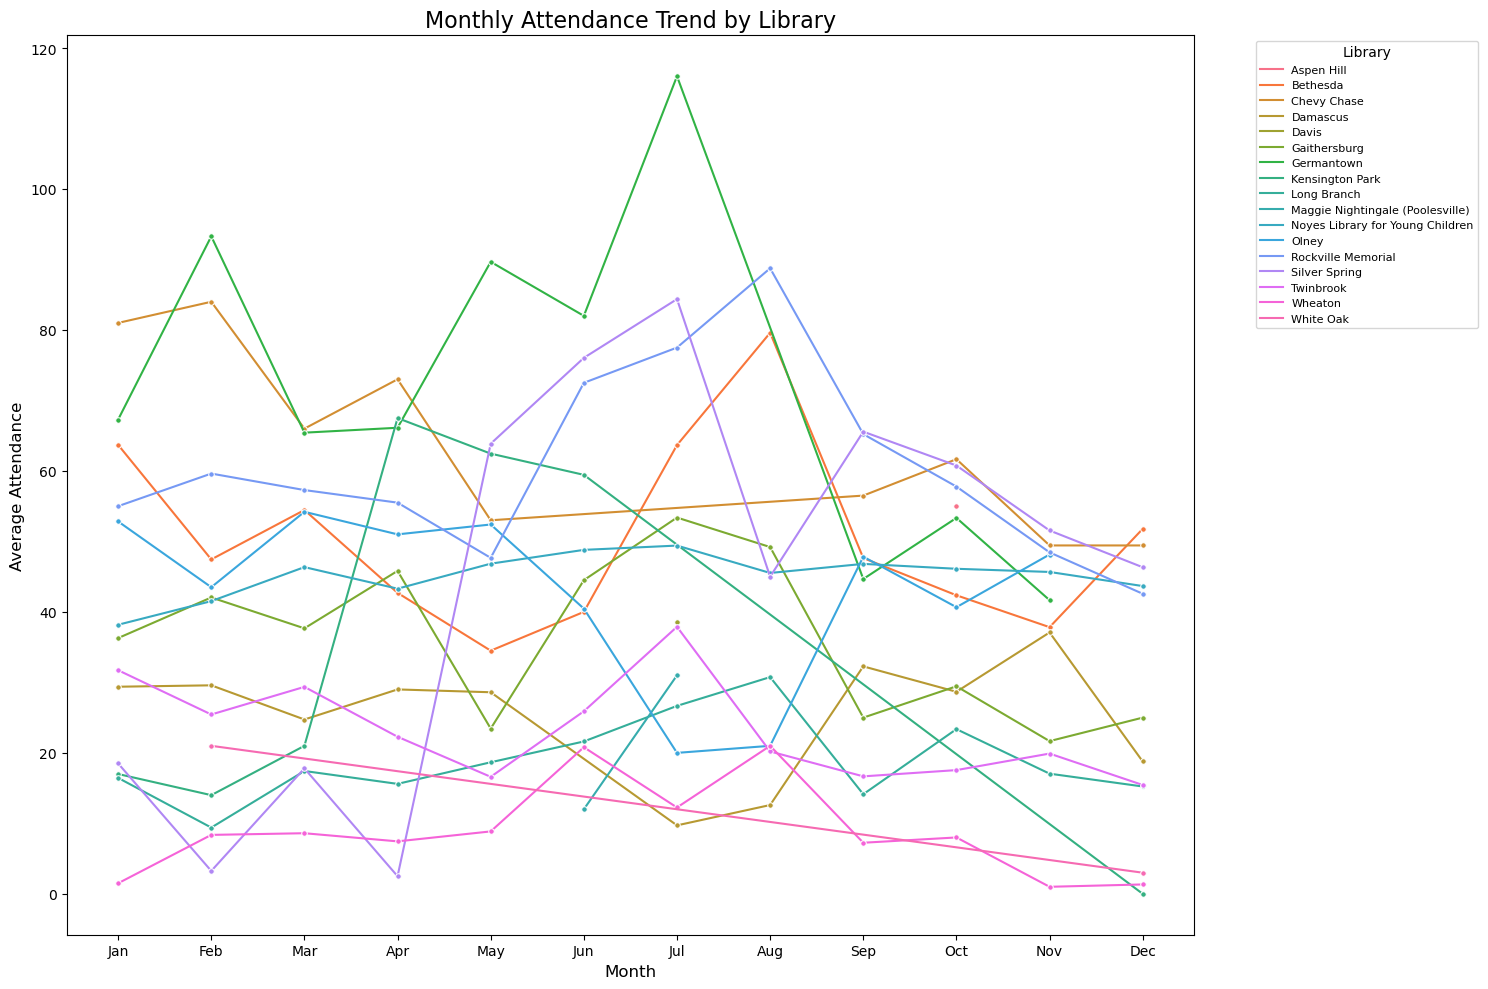

In [209]:
#Problem 11: Monthly Attendance Trend by Library
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_library_attendance = df.groupby(['Month', 'Library'])['Attendance'].mean().reset_index()

plt.figure(figsize=(15, 10))

sns.lineplot(x='Month', y='Attendance', hue='Library', data=monthly_library_attendance, 
             marker='o', linewidth=1.5, markersize=4)

plt.title('Monthly Attendance Trend by Library', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Attendance', fontsize=12)

plt.legend(title='Library', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

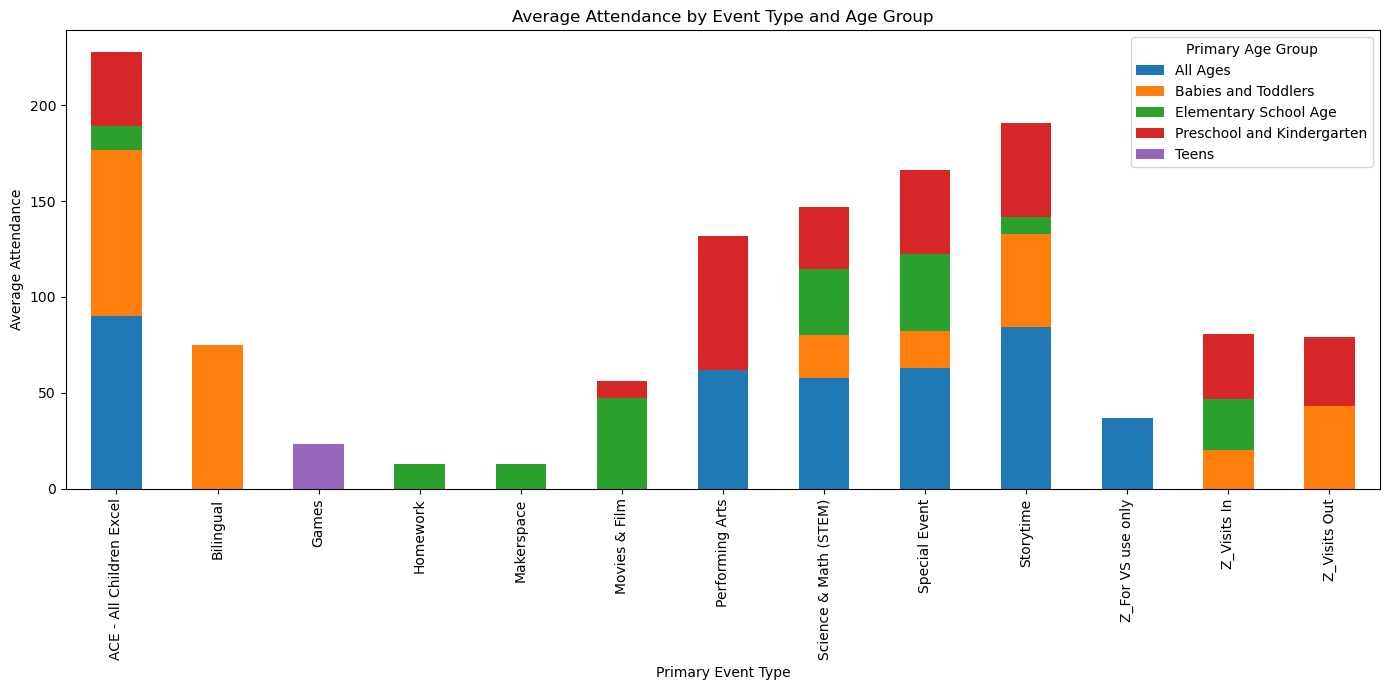

In [210]:
#Problem 12: Attendance by Event Type and Age Group
combo = df.groupby(['Primary Event Type', 'Primary Age Group'])['Attendance'].mean().unstack()
combo.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Average Attendance by Event Type and Age Group')
plt.ylabel('Average Attendance')
plt.tight_layout()
plt.show()

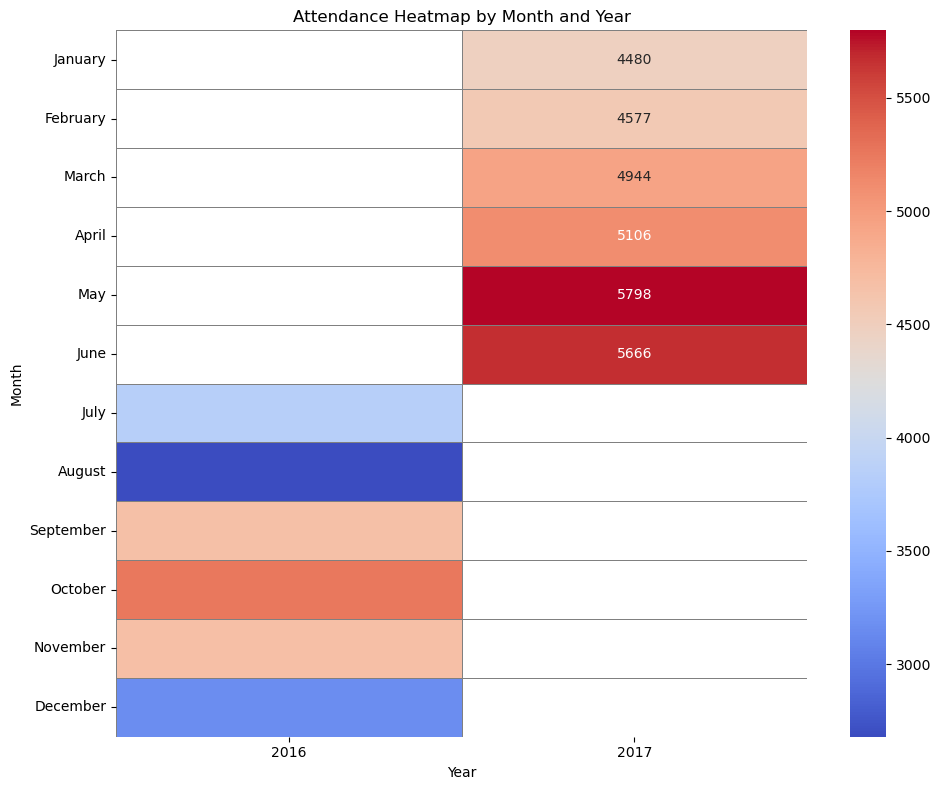

In [211]:
#Problem 13: Attendance Heatmap by Date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

month_year_data = df.groupby(['Year', 'Month'])['Attendance'].sum().reset_index()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

month_year_data['Month'] = pd.Categorical(month_year_data['Month'],
                                          categories=month_order, ordered=True)

pivot_heat = month_year_data.pivot(index='Month', columns='Year', values='Attendance')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_heat, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5, linecolor='gray')
plt.title('Attendance Heatmap by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

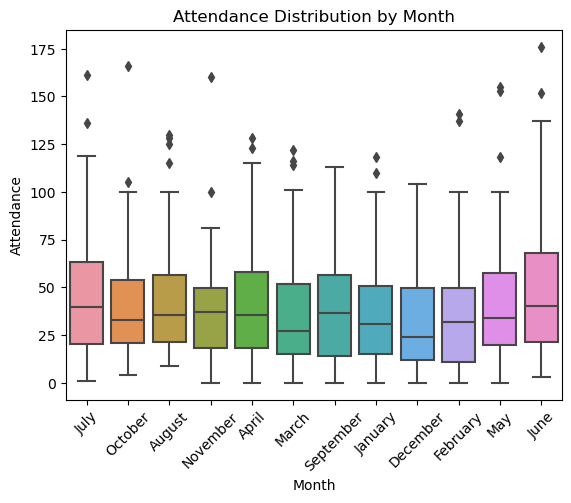

In [212]:
#Problem 14: Attendance Box Plot by Month
sns.boxplot(data=df, x='Month', y='Attendance')
plt.title('Attendance Distribution by Month')
plt.xticks(rotation=45)
plt.show()

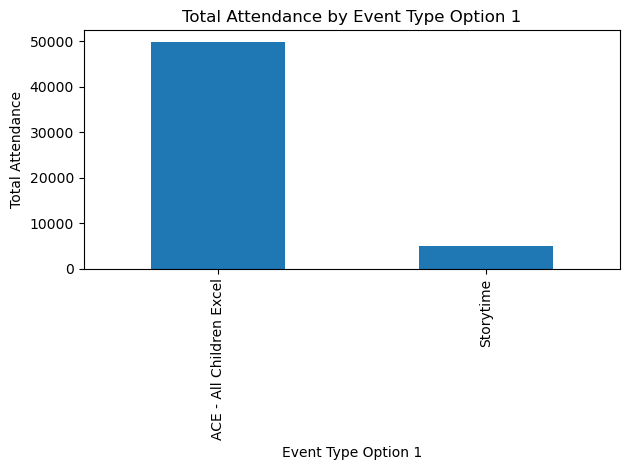

In [213]:
#Problem 15: Event Type Option Comparison
option1_attendance = df.groupby('Event Type Option 1')['Attendance'].sum()
option1_attendance.plot(kind='bar', title='Total Attendance by Event Type Option 1')
plt.ylabel('Total Attendance')
plt.tight_layout()
plt.show()

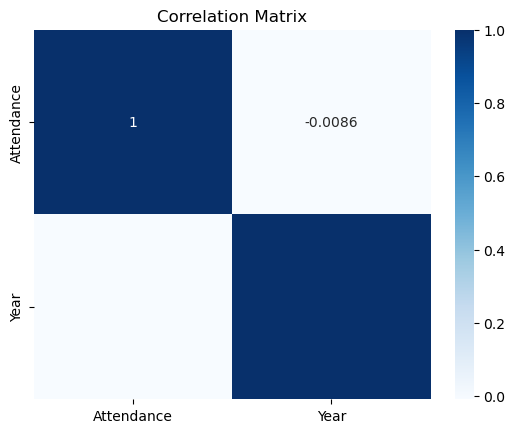

In [214]:
#Problem 16: Correlation Analysis
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

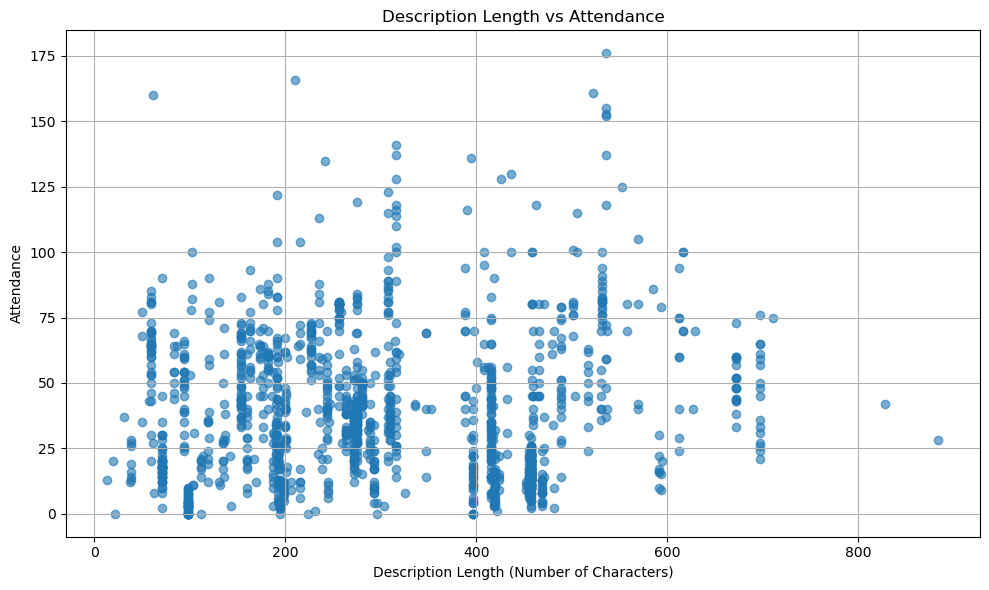

In [215]:
#Problem 17: Attendance Distribution by Description Length
df['Description Length'] = df['Description'].astype(str).apply(len)
plt.figure(figsize=(10, 6))
plt.scatter(df['Description Length'], df['Attendance'], alpha=0.6)
plt.title('Description Length vs Attendance')
plt.xlabel('Description Length (Number of Characters)')
plt.ylabel('Attendance')
plt.grid(True)
plt.tight_layout()
plt.show()

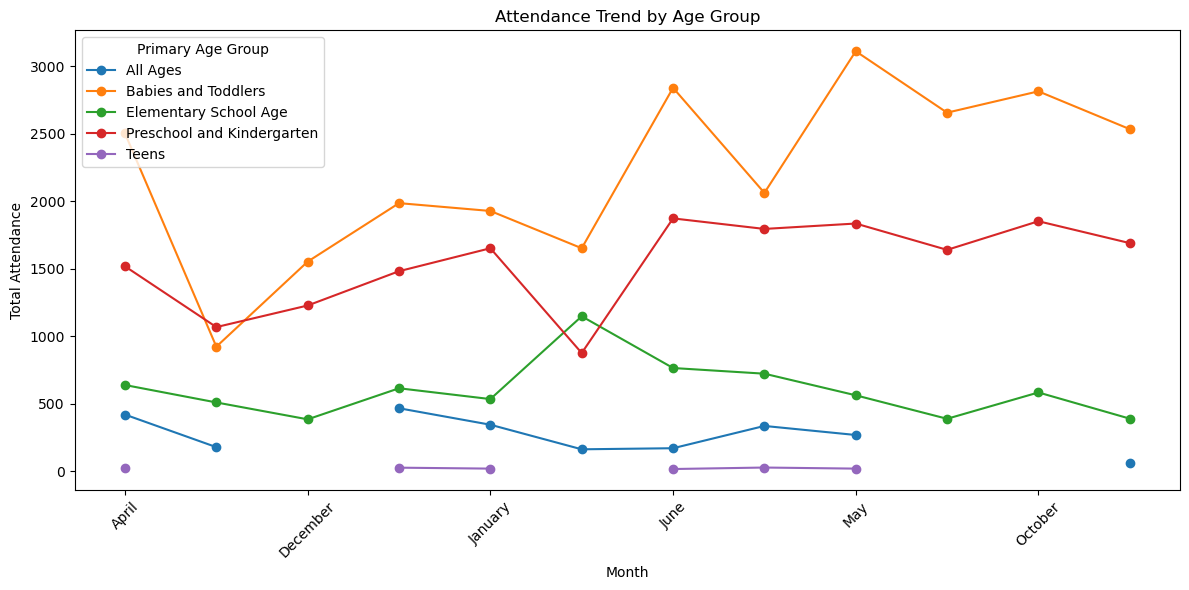

In [216]:
#Problem 18: Trend Analysis by Age Group
age_trend = df.groupby(['Month', 'Primary Age Group'])['Attendance'].sum().unstack()
age_trend.plot(marker='o', figsize=(12,6))
plt.title('Attendance Trend by Age Group')
plt.ylabel('Total Attendance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

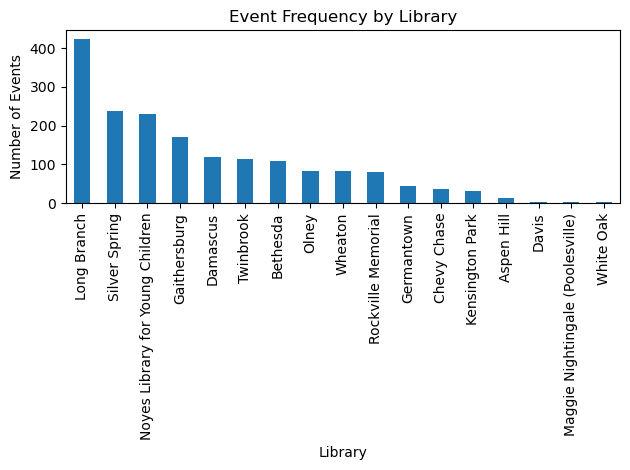

In [217]:
#Problem 19: Library Event Frequency
library_freq = df['Library'].value_counts()
library_freq.plot(kind='bar', title='Event Frequency by Library')
plt.ylabel('Number of Events')
plt.tight_layout()
plt.show()

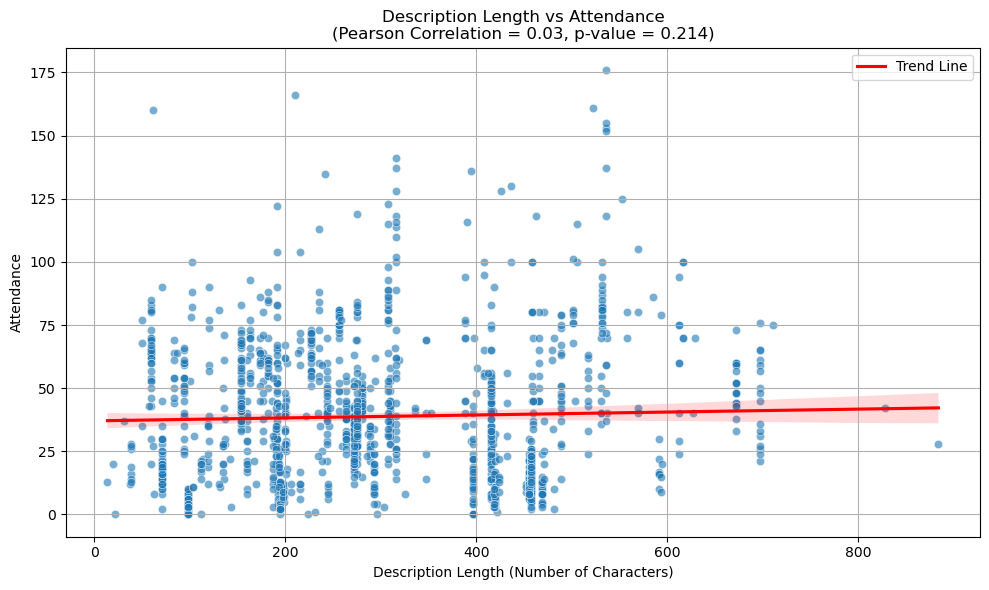

In [218]:
#Problem 20: Impact of Event Description on Attendance
from scipy.stats import pearsonr

df['Description Length'] = df['Description'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df_clean = df.dropna(subset=['Description Length', 'Attendance'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Description Length', y='Attendance', alpha=0.6)
sns.regplot(data=df_clean, x='Description Length', y='Attendance', scatter=False, color='red', label='Trend Line')

corr, p_value = pearsonr(df_clean['Description Length'], df_clean['Attendance'])

plt.title(f'Description Length vs Attendance\n(Pearson Correlation = {corr:.2f}, p-value = {p_value:.3f})')
plt.xlabel('Description Length (Number of Characters)')
plt.ylabel('Attendance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()